In [1]:
import pandas
import datetime
import numpy
from sklearn import linear_model
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
from matplotlib import rcParams

In [85]:
# scale, mlat --> polynomial fit
# scale, norm_mlt --> linear

# shape, mlat  --> linear
# shape, norm_mlt  --> linear

#loc, mlat --> exponential
#loc, norm_mlt --> linear

In [2]:
# read data from the lshell file
fitSgDF = pandas.read_csv("../data/fit-skewed-gaussian.txt", sep=' ')
fitSgDF.head()

,dst_bin,dst_mean,loc,mlat,norm_mlt,scale,shape
0,"(-10, 10]",-3,193.343048,58,1,350.289070,77.307753
1,"(-25, -10]",-17,209.169066,58,1,420.156530,25.834191
2,"(-50, -25]",-36,229.189543,58,1,393.217864,17.229693
3,"(-10, 10]",-3,286.660543,61,1,367.835992,12.436087
4,"(-25, -10]",-17,267.437051,61,1,305.736732,9.318884


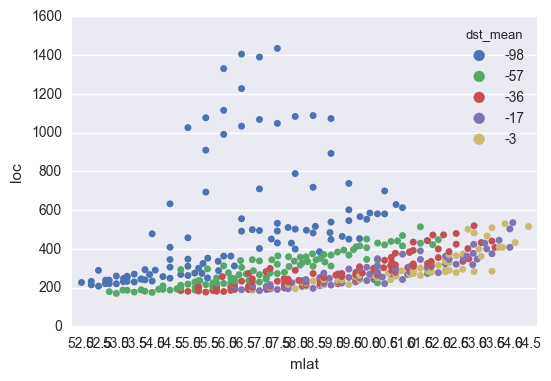

In [84]:
selParam = "loc"
selDF = fitSgDF#[ (fitSgDF["dst_bin"] == "(-150, -75]") ] # & (fitSgDF["norm_mlt"] == -6.)
sns.swarmplot( x="mlat", y=selParam, hue="dst_mean", data=selDF[ ["mlat", "norm_mlt", "dst_bin", "dst_mean" , selParam] ])

In [86]:
# scale, mlat --> polynomial fit
# scale, norm_mlt --> linear
##########
# shape, mlat  --> linear
# shape, norm_mlt  --> linear
#########
#loc, mlat --> exponential
#loc, norm_mlt --> linear


,dst_bin,dst_mean,loc,mlat,norm_mlt,scale,shape
38,"(-150, -75]",-98,510.208737,58.0,-3,286.880571,2.652013
65,"(-150, -75]",-98,449.895252,59.5,-3,261.866965,2.012221
72,"(-150, -75]",-98,491.165403,56.5,-3,527.015321,2.937909
76,"(-150, -75]",-98,495.808280,58.5,-3,258.141016,1.997515
80,"(-150, -75]",-98,494.368675,57.0,-3,475.939346,5.042799


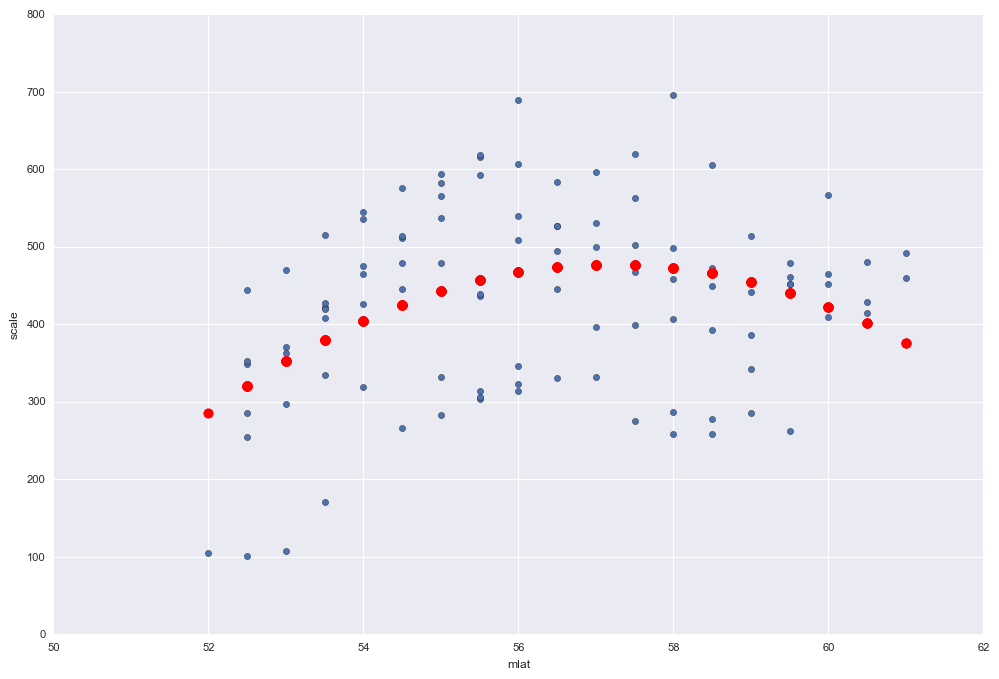

In [128]:
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(1,1,1)

sns.set_style("darkgrid")
sns.set_context("paper")

testFitDF = fitSgDF[ (fitSgDF["dst_bin"] == "(-150, -75]") ]

pfScaleMlat = numpy.polyfit(testFitDF["mlat"], testFitDF["scale"], 2)
pvScaleMlat = numpy.poly1d(pfScaleMlat)

testFitDF.plot( x="mlat", y="scale", kind="scatter", ax=ax)
ax.scatter( testFitDF["mlat"], pvScaleMlat(testFitDF["mlat"]),50, color="red")